In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\JupyterNotebook\DataSet\lending_final.csv')
df.head()

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,8000.0,8000.0,8000.0,36 months,10.99%,261.88,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,20800.0,NaN,NaN,NaN
1,NaN,NaN,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,9.67%,321.13,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,22300.0,NaN,NaN,NaN
3,NaN,NaN,11500.0,11500.0,11500.0,60 months,22.90%,323.54,E,E4,...,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN
4,NaN,NaN,15000.0,15000.0,15000.0,36 months,8.90%,476.30,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN


In [3]:
df.shape

(188183, 73)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           2 non-null       object 
 1   member_id                    0 non-null       float64
 2   loan_amnt                    188181 non-null  float64
 3   funded_amnt                  188181 non-null  float64
 4   funded_amnt_inv              188181 non-null  float64
 5   term                         188181 non-null  object 
 6   int_rate                     188181 non-null  object 
 7   installment                  188181 non-null  float64
 8   grade                        188181 non-null  object 
 9   sub_grade                    188181 non-null  object 
 10  emp_title                    176444 non-null  object 
 11  emp_length                   180294 non-null  object 
 12  home_ownership               188181 non-null  object 
 13 

In [5]:
X = df.drop('loan_status',1)
y = df['loan_status']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 , random_state = 4)

In [7]:
col = df.isnull().sum()
col_drop = col[col>0.25*len(df)].index.tolist()
for x in df:
    if df[x].nunique() == 1 :
        col_drop.append(x)

In [8]:
X_train.drop(columns=col_drop,axis=1,inplace=True)
X_test.drop(columns=col_drop,axis=1,inplace=True)

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
y_train = np.where((y_train == 'Fully Paid') |(y_train == 'Current'), 0, 1)
y_test = np.where((y_test == 'Fully Paid') |(y_test == 'Current'), 0, 1)

In [10]:
# categorical and numerical variables
cat = X_train.select_dtypes(include = 'O').columns.tolist()
num = X_train.select_dtypes(exclude = 'O').columns.tolist()

In [11]:
# Filling missing values

# Train Data

for x in cat:
    mode = X_train[x].mode()[0]
    X_train[x].fillna(mode, inplace = True)

for x in num:
    mean = X_train[x].mean()
    X_train[x].fillna(mean,inplace = True)

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
# Test Data
for x in cat:
    mode = X_train[x].mode()[0]
    X_test[x].fillna(mode,inplace = True)

for x in num:
    mean = X_train[x].mean()
    X_test[x].fillna(mean,inplace = True)

In [13]:
# Label encoding

le = LabelEncoder()
for x in cat:
    
    X_train[x] = le.fit_transform(X_train[x])
    X_test[x] = le.fit_transform(X_test[x])

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
rf = RandomForestClassifier(random_state =42,max_depth=2,min_samples_leaf=5000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [15]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, y_pred))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[39705     0]
 [ 4221  3120]]
Classification_report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     39705
           1       1.00      0.43      0.60      7341

    accuracy                           0.91     47046
   macro avg       0.95      0.71      0.77     47046
weighted avg       0.92      0.91      0.89     47046



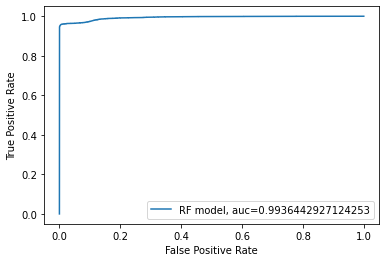

In [16]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RF model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
xgb = XGBClassifier(learning_rate = 0.0001)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [18]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, y_pred))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[39705     0]
 [  250  7091]]
Classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39705
           1       1.00      0.97      0.98      7341

    accuracy                           0.99     47046
   macro avg       1.00      0.98      0.99     47046
weighted avg       0.99      0.99      0.99     47046



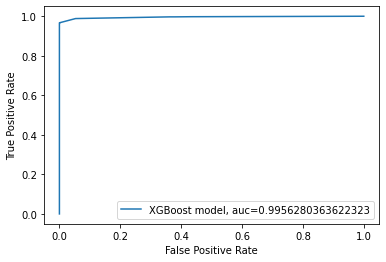

In [19]:
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XGBoost model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()